Hola **Samuel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas.

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

# Paso 1. Lleva a cabo el análisis exploratorio de datos
#### - Abrir el archivo de datos y leer la información general
#### - Preparar los datos para el análisis
- *Cambia el nombre de las columnas de manera que sea conveniente para ti*
- *Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario*

# Paso 2. Identificar operadores ineficaces
#### - Estudiar y comprobar los datos
- Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):

- Analizar el tiempo de espera promedio para las llamadas entrantes por operador (Average Call Duration - ACD):

  - Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 75 del tiempo promedio).

- Tasa de Llamadas Internas (Internal Call Rate - ICR)
  

- Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)

- Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)

#### - Generar métricas clave para clasificar ineficiencia KPIs
   - Analisar y medir el desempeno por porcentaje de los trabajadores


# Paso 3. Medir la eficiencia de los operadores
  - Analisar y medir el desempeno por porcentaje de los trabajadores
      



## Paso 1. Lleva a cabo el análisis exploratorio de datos
#### - Abrir el archivo de datos y leer la información general
#### - Preparar los datos para el análisis
- *Cambia el nombre de las columnas de manera que sea conveniente para ti*
- *Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
clients = pd.read_csv('/content/telecom_clients_us.csv')
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [7]:
dataset = pd.read_csv('/content/telecom_dataset_us.csv')
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [8]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [9]:
# Cambio de tipo de dato  correspondiente
clients['user_id'] = clients['user_id'].astype(int)  # Confirmar que son enteros
clients['tariff_plan'] = clients['tariff_plan'].astype(str)  # Confirmar que son cadenas
clients['date_start'] = pd.to_datetime(clients['date_start'], errors='coerce')  # Convertir a formato fecha
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [10]:
# Verificar valores nulos después de la conversión
display(clients.isnull().sum())

,0
user_id,0
tariff_plan,0
date_start,0


In [11]:
# Verificar filas duplicadas en todo el DataFrame
duplicated_rows = clients[clients.duplicated()]
print(f"Número de filas duplicadas: {len(duplicated_rows)}")


# Verificar duplicados en una columna específica (por ejemplo, 'user_id')
duplicated_user_ids = clients[clients['user_id'].duplicated()]
print(f"Número de IDs de usuario duplicados: {len(duplicated_user_ids)}")



Número de filas duplicadas: 0
Número de IDs de usuario duplicados: 0


## **Limpieza de Datos en el df clients**
*Durante el proceso de preparación de los datos, se verificó la calidad del conjunto proporcionado. En primer lugar, se confirmó que no existen valores nulos ni duplicados en el DataFrame, lo que garantiza la integridad de la información. Además, se ajustaron los tipos de datos en las columnas clave:*

- La columna user_id fue convertida a un formato de tipo entero para facilitar su manipulación.
- La columna tariff_plan se aseguró como tipo texto, reflejando su naturaleza categórica.
- La columna date_start fue transformada a un formato de fecha (datetime) para permitir un análisis temporal más preciso.

## *dataset*

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [13]:
# Ajustar tipos de datos
dataset['user_id'] = dataset['user_id'].astype(int)  # Confirmar como entero
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')  # Convertir a formato de fecha
dataset['direction'] = dataset['direction'].astype(str)  # Asegurar como texto
dataset['internal'] = dataset['internal'].astype('boolean')  # Convertir a tipo booleano (maneja nulos)
dataset['operator_id'] = dataset['operator_id'].fillna(-1).astype(int)  # Manejar nulos y convertir a entero
dataset['is_missed_call'] = dataset['is_missed_call'].astype(bool)  # Asegurar como booleano
dataset['calls_count'] = dataset['calls_count'].astype(int)  # Confirmar como entero
dataset['call_duration'] = dataset['call_duration'].astype(int)  # Confirmar como entero
dataset['total_call_duration'] = dataset['total_call_duration'].astype(int)  # Confirmar como entero

# Verificar los cambios
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  boolean                  
 4   operator_id          53902 non-null  int64                    
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), boolean(1), datetime64[ns, UTC+03:00](1), int64(5), object(1)
memory usage: 3.0+ MB


None

Se ajustaron los tipos de datos del DataFrame para optimizar su uso y garantizar coherencia:

- date pasó de object a datetime64[ns, UTC+03:00] para permitir análisis temporales.
- internal se convirtió de object a boolean, mejorando claridad y memoria.
operator_id cambió de float64 a int64, corrigiendo su representación como identificador.

El resto de las columnas mantuvo sus tipos adecuados. Estos cambios mejoraron la eficiencia y precisión del análisis.

In [14]:
# Realizar el merge entre dataset y clients usando 'user_id' como clave
merged_df = dataset.merge(clients, on='user_id', how='inner')

# Mostrar las primeras filas del DataFrame combinado
merged_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,-1,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,B,2019-08-01


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial y la limpieza de los datos, este paso es clave en cada análisis para que las métricas sean lo más acertadas posible
</div>

# Paso 2. Identificar operadores ineficaces
#### - Estudiar y comprobar los datos
- Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):

- Analizar el tiempo de espera promedio para las llamadas entrantes por operador (Average Call Duration - ACD):

  - Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 75 del tiempo promedio).

- Tasa de Llamadas Internas (Internal Call Rate - ICR)
  

- Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)

- Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)

### *Identificar operadores con un alto porcentaje de llamadas perdidas (Lost Call Rate - LCR):*

  - *Filtrar las llamadas entrantes y contar el número de llamadas perdidas por operador.*

In [15]:
# Filtrar las llamadas entrantes
incoming_calls = dataset[dataset['direction'] == 'in']

# Filtrar las llamadas perdidas dentro de las entrantes
missed_incoming_calls = incoming_calls[incoming_calls['is_missed_call'] == True]

# Contar el número de llamadas perdidas por operador
missed_calls_by_operator = missed_incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Contar el número total de llamadas entrantes por operador
total_calls_by_operator = incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Combinar los datos para incluir todos los operadores (merge tipo outer)
lost_call_rate = pd.merge(
    missed_calls_by_operator,
    total_calls_by_operator,
    on='operator_id',
    how='outer',
    suffixes=('_missed', '_total')
)

# Rellenar valores faltantes con 0 para operadores sin llamadas perdidas
lost_call_rate['calls_count_missed'] = lost_call_rate['calls_count_missed'].fillna(0)
lost_call_rate['calls_count_total'] = lost_call_rate['calls_count_total'].fillna(0)

# Calcular el porcentaje de llamadas perdidas
lost_call_rate['lost_call_rate'] = (lost_call_rate['calls_count_missed'] / lost_call_rate['calls_count_total'].replace(0, 1)) * 100

# Renombrar columnas para mayor claridad
lost_call_rate = lost_call_rate.rename(columns={
    'calls_count_missed': 'missed_calls_count',
    'calls_count_total': 'total_calls_count'
})

# Ordenar por porcentaje de llamadas perdidas en orden descendente
lost_call_rate_sorted = lost_call_rate.sort_values(by='lost_call_rate', ascending=False)

# Mostrar el DataFrame ajustado
lost_call_rate_sorted.head(10)


,operator_id,missed_calls_count,total_calls_count,lost_call_rate
642,948756,1.0,1,100.000000
0,-1,112453.0,113167,99.369074
186,904344,6.0,7,85.714286
288,913886,1.0,2,50.000000
211,906392,7.0,19,36.842105
699,957922,1.0,3,33.333333
498,937432,1.0,3,33.333333
468,934098,2.0,6,33.333333
221,906412,7.0,26,26.923077
266,910226,2.0,8,25.000000


## *Duración Promedio de Llamadas (Average Call Duration - ACD):*

Calcular el tiempo promedio de espera para cada operador.

Identificar aquellos que superen un umbral definido (por ejemplo, el percentil 95 del tiempo promedio).

In [16]:
# Filtrar las llamadas entrantes
incoming_calls = dataset[dataset['direction'] == 'in'].copy()  # Usar .copy() para evitar el warning

# Calcular el tiempo de espera
incoming_calls['waiting_time'] = incoming_calls['total_call_duration'] - incoming_calls['call_duration']

# Contar operadores únicos
unique_operators = incoming_calls['operator_id'].nunique()
print(f"Operadores únicos: {unique_operators}")

# Calcular el tiempo promedio de espera por operador
average_waiting_time = incoming_calls.groupby('operator_id')['waiting_time'].mean().reset_index()

# Renombrar columnas para mayor claridad
average_waiting_time = average_waiting_time.rename(columns={'waiting_time': 'average_waiting_time'})

# Ordenar por porcentaje de llamadas perdidas en orden descendente
average_waiting_time = average_waiting_time.sort_values(by='average_waiting_time', ascending=False)

# Mostrar el resultado
average_waiting_time.head(10)

Operadores únicos: 755


,operator_id,average_waiting_time
338,919794,1039.540541
207,906070,853.312500
336,919790,839.802817
446,931458,655.236364
208,906076,611.500000
359,921318,607.466667
329,919204,579.277778
334,919552,556.776316
289,913938,535.047619
335,919554,518.154762


In [17]:
# Calcular el tiempo de espera
dataset['waiting_time'] = dataset['total_call_duration'] - dataset['call_duration']

# Calcular el tiempo promedio de espera por operador
average_waiting_time = dataset.groupby('operator_id')['waiting_time'].mean().reset_index()

# Calcular el percentil 95 del tiempo promedio de espera
threshold_95 = average_waiting_time['waiting_time'].quantile(0.95)

# Identificar si cada operador supera el umbral del percentil 95
average_waiting_time['above_threshold'] = average_waiting_time['waiting_time'] > threshold_95

# Ordenar el tiempo promedio de espera en orden ascendente
average_waiting_time_sorted = average_waiting_time.sort_values(by='waiting_time', ascending=False)

# Mostrar resultados
print("Percentil 95 del tiempo promedio de espera:", threshold_95)
print(f"Operadores que superan el umbral del percentil 95: {len(average_waiting_time_sorted[average_waiting_time_sorted['above_threshold']])}")
average_waiting_time_sorted.head(10)

Percentil 95 del tiempo promedio de espera: 1126.974270270269
Operadores que superan el umbral del percentil 95: 55


,operator_id,waiting_time,above_threshold
552,925922,5907.443038,True
30,885890,5727.133574,True
584,929428,5325.342857,True
29,885876,4816.241379,True
318,908640,3456.461538,True
583,929426,3316.558824,True
844,945278,2858.479167,True
449,919364,2841.465116,True
848,945286,2185.774648,True
871,945904,2128.657895,True


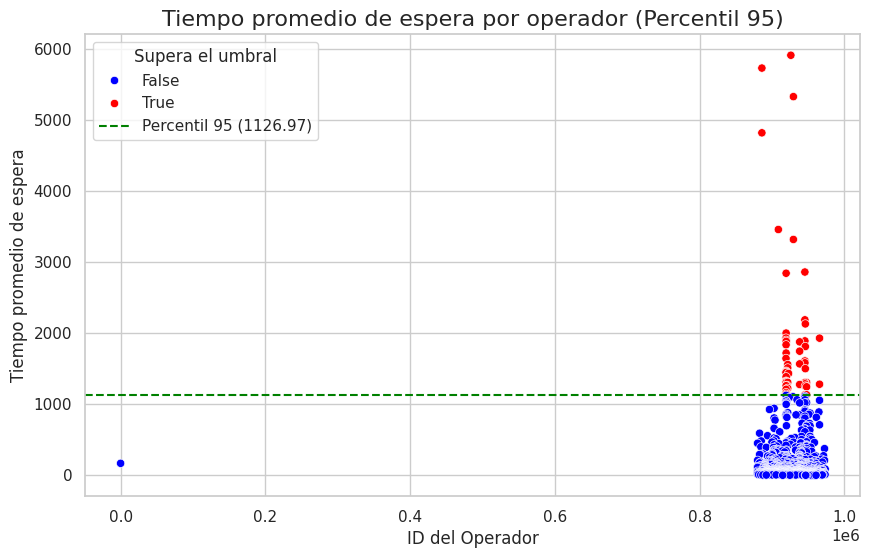

In [18]:

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=average_waiting_time_sorted,
    x='operator_id',
    y='waiting_time',
    hue='above_threshold',  # Colorear según si superan el umbral
    palette={True: 'red', False: 'blue'},
    legend="full"
)

# Agregar una línea de referencia para el percentil 95
plt.axhline(y=threshold_95, color='green', linestyle='--', label=f'Percentil 95 ({threshold_95:.2f})')

# Etiquetas y título
plt.title('Tiempo promedio de espera por operador (Percentil 95)', fontsize=16)
plt.xlabel('ID del Operador', fontsize=12)
plt.ylabel('Tiempo promedio de espera', fontsize=12)
plt.legend(title='Supera el umbral')

# Mostrar el gráfico
plt.show()

### *Este gráfico muestra el tiempo promedio de espera por operador, con un umbral definido por el percentil 95 (1126.97 segundos). Los puntos en rojo representan operadores cuyo tiempo promedio de espera supera este umbral, mientras que los puntos en azul indican operadores que están por debajo.*

simplycontact.com/how-to-measure-call-center-performance-post/

pmc.ncbi.nlm.nih.gov/articles/PMC2645141/

www.customercontactcentral.com/average-handle-time/wait-times/

simplycontact.com/average-hold-time-for-contact-centers/

www.staceybarr.com/measure-up/
how-to-meaningfully-measure-queue-performance-and-waiting-times/

## *Tasa de Llamadas Internas (Internal Call Rate - ICR):*

In [19]:
# Filtrar las llamadas internas y totales por operador
icr_data = dataset.groupby('operator_id').agg(
    internal_calls=('calls_count', lambda x: x[dataset.loc[x.index, 'internal']].sum()),
    total_calls=('calls_count', 'sum')
)

# Calcular la ICR
icr_data['ICR'] = (icr_data['internal_calls'] / icr_data['total_calls']) * 100

# Ver los resultados ordenados por ICR
icr_data.sort_values(by='ICR', ascending=False)


,internal_calls,total_calls,ICR
operator_id,,,
923646,2,2,100.0
969284,1,1,100.0
967204,3,3,100.0
966686,3,3,100.0
940772,2,2,100.0
...,...,...,...
914348,0,9,0.0
914426,0,7,0.0
914626,0,1,0.0


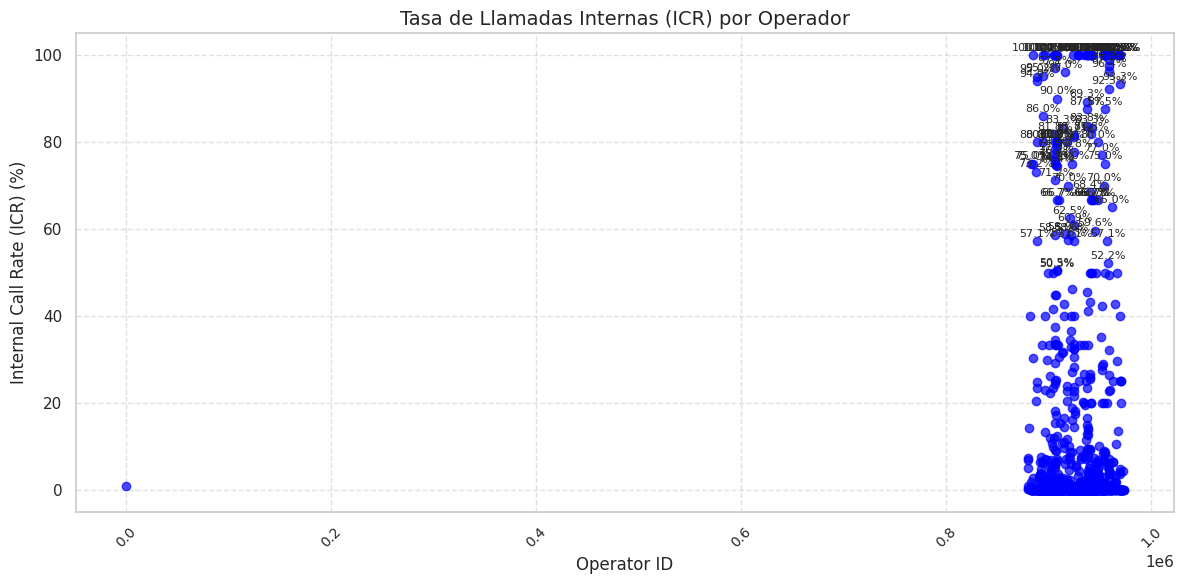

In [31]:
icr_data = icr_data.reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(icr_data['operator_id'], icr_data['ICR'], color='blue', alpha=0.7)

# Configurar el gráfico
plt.title('Tasa de Llamadas Internas (ICR) por Operador', fontsize=14)
plt.xlabel('Operator ID', fontsize=12)
plt.ylabel('Internal Call Rate (ICR) (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Agregar etiquetas de datos en puntos clave (opcional)
for i, row in icr_data.iterrows():
    if row['ICR'] > 50:  # Por ejemplo, destacar operadores con ICR mayor a 50%
        plt.text(row['operator_id'], row['ICR'] + 1, f"{row['ICR']:.1f}%", ha='center', fontsize=8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Analisis de la Grafica

La distribución general de la Tasa de Llamadas Internas (ICR) revela que la mayoría de los operadores se concentran en niveles altos, cercanos al 100%, lo cual indica un desempeño consistente y eficiente en la gestión de llamadas internas. Sin embargo, se observan casos atípicos con tasas significativamente bajas, incluso cercanas al 0%.

Estas anomalías pueden ser indicativas de fallas en los procesos internos, problemas técnicos o carencias en la capacitación de los operadores. Es crucial realizar un análisis detallado para identificar las causas específicas de estos bajos desempeños.

### *Eficiencia de Llamadas Salientes (Outbound Call Efficiency - OCE)*

In [20]:
# Filtrar las llamadas salientes
outbound_calls = dataset[dataset['direction'] == 'out']

# Calcular las llamadas salientes exitosas por operador
outbound_calls_success = outbound_calls[outbound_calls['is_missed_call'] == 0].groupby('operator_id')['calls_count'].sum()

# Calcular el total de llamadas salientes por operador
outbound_calls_total = outbound_calls.groupby('operator_id')['calls_count'].sum()

# Calcular la Eficiencia de Llamadas Salientes (OCE)
outbound_call_efficiency = (outbound_calls_success / outbound_calls_total) * 100

# Crear un DataFrame para visualizar los resultados
oce_df = outbound_call_efficiency.reset_index(name='OCE (%)').sort_values(by='OCE (%)', ascending=False)

oce_df

,operator_id,OCE (%)
525,935956,100.0
292,914256,100.0
598,939236,100.0
842,963716,100.0
273,910902,100.0
...,...,...
864,969288,NaN
866,969380,NaN
869,970240,NaN
872,970250,NaN


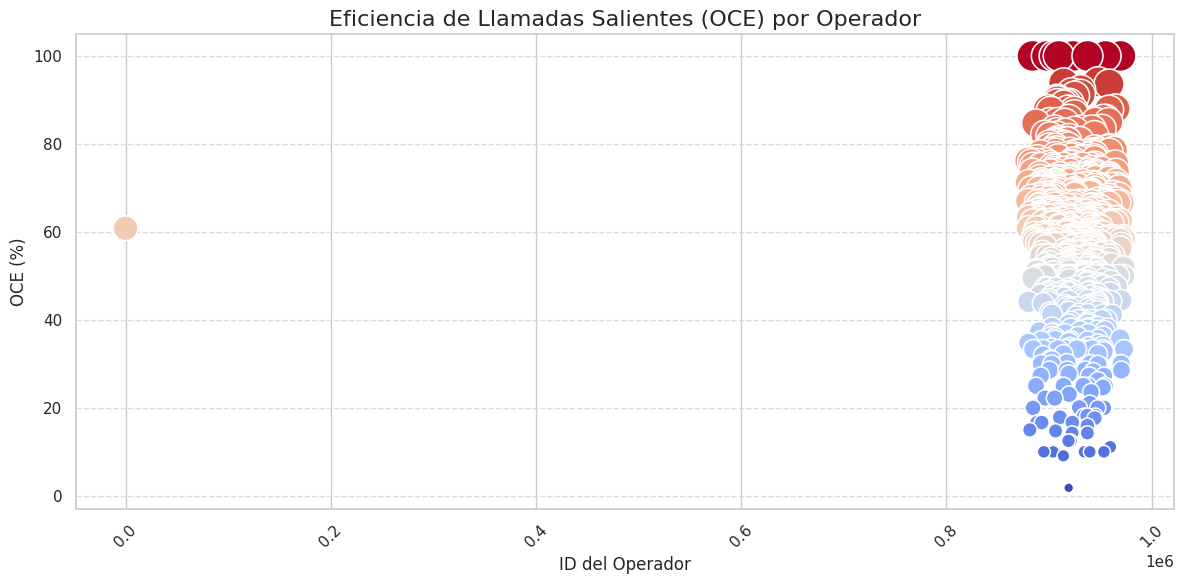

In [34]:
# Crear la gráfica de dispersión para OCE
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=oce_df,
    x='operator_id',
    y='OCE (%)',
    hue='OCE (%)',
    palette='coolwarm',
    size='OCE (%)',
    sizes=(50, 500),
    legend=None
)

# Personalizar el gráfico
plt.title('Eficiencia de Llamadas Salientes (OCE) por Operador', fontsize=16)
plt.xlabel('ID del Operador', fontsize=12)
plt.ylabel('OCE (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Analisis de la grafica

En general, la mayoría de los operadores se agrupan en niveles altos de OCE (Eficiencia de Llamadas Salientes), concentrándose cerca del 100%. Esto indica que, en términos generales, los operadores mantienen un buen rendimiento operativo. Sin embargo, también se observan puntos en la parte inferior del gráfico, lo que sugiere la existencia de operadores con niveles significativamente bajos de eficiencia, posiblemente cercanos al 0%.

### *Porcentaje de Llamadas Exitosas (Call Success Rate - CSR)*

In [21]:
# Calcular el total de llamadas por operador
total_calls = dataset.groupby('operator_id')['calls_count'].sum()

# Calcular el total de llamadas exitosas (no perdidas) por operador
successful_calls = dataset[dataset['is_missed_call'] == 0].groupby('operator_id')['calls_count'].sum()

# Calcular el Porcentaje de Llamadas Exitosas (CSR)
call_success_rate = (successful_calls / total_calls) * 100

# Crear un DataFrame para visualizar los resultados
csr_df = call_success_rate.reset_index(name='CSR (%)').sort_values(by='CSR (%)', ascending=False)

csr_df

,operator_id,CSR (%)
1092,973286,100.0
335,910018,100.0
580,929332,100.0
826,944246,100.0
581,929340,100.0
...,...,...
1042,962904,NaN
1065,969262,NaN
1068,969284,NaN
1078,970250,NaN


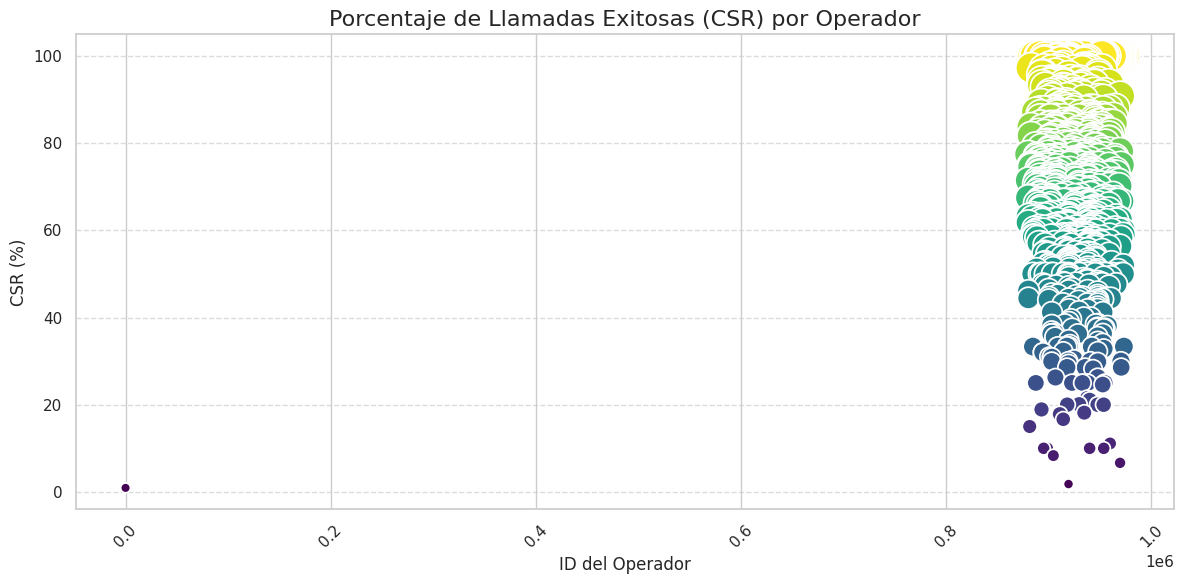

In [35]:
# Crear la gráfica de dispersión para CSR
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=csr_df,
    x='operator_id',
    y='CSR (%)',
    hue='CSR (%)',
    palette='viridis',
    size='CSR (%)',
    sizes=(50, 500),
    legend=None
)

# Personalizar el gráfico
plt.title('Porcentaje de Llamadas Exitosas (CSR) por Operador', fontsize=16)
plt.xlabel('ID del Operador', fontsize=12)
plt.ylabel('CSR (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## Analisis de la Grafica

La gráfica muestra que la mayoría de los operadores tienen un rendimiento sobresaliente, con CSR superiores al 80%. Sin embargo, un pequeño porcentaje de operadores presenta valores bajos de CSR, lo que podría indicar problemas operativos específicos que deben abordarse. Esto sugiere que, aunque el sistema es en su mayoría eficiente, hay espacio para optimizar y elevar el desempeño de los operadores menos efectivos.








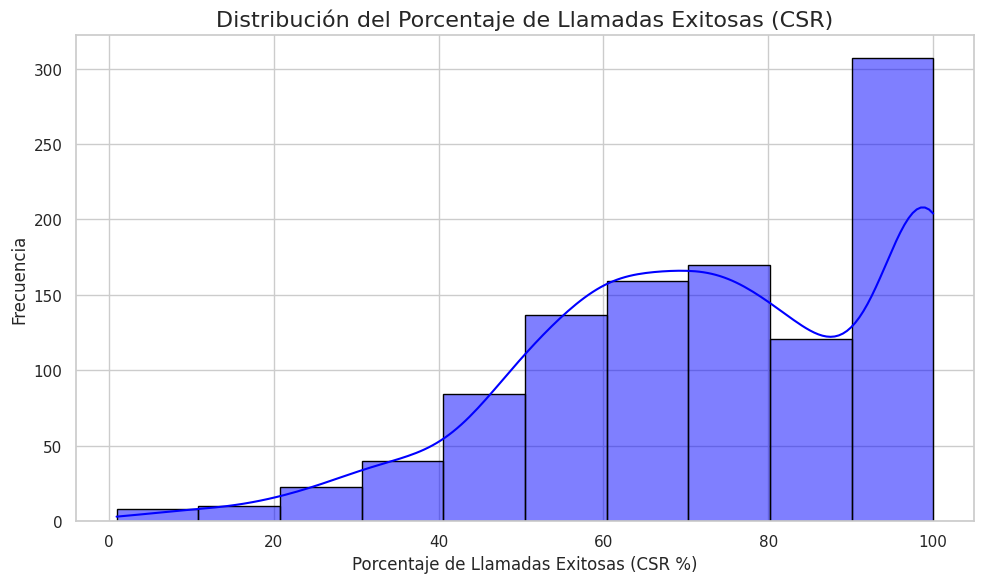

In [29]:
# Limpiar valores NaN para graficar
cleaned_csr_df = csr_df.dropna()

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear gráfico de distribución
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_csr_df['CSR (%)'], bins=10, kde=True, color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución del Porcentaje de Llamadas Exitosas (CSR)', fontsize=16)
plt.xlabel('Porcentaje de Llamadas Exitosas (CSR %)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Analisis de grafica

El gráfico muestra la distribución del Porcentaje de Llamadas Exitosas (CSR). La mayoría de los operadores tienen un CSR alto, concentrándose entre el 80% y 100%, lo que indica un buen desempeño general. Sin embargo, hay una menor frecuencia de operadores con CSR bajo, especialmente por debajo del 50%, lo que podría reflejar áreas de mejora.

La curva KDE refuerza esta tendencia, mostrando una alta densidad en CSR elevados y una cola larga hacia valores bajos. Se recomienda investigar las causas de bajo desempeño en operadores con CSR < 50% y validar los datos de aquellos con CSR igual al 100%.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con las métricas planteadas, sin embargo, para comunicar mejor y realizar mejor la presentación te recomendaría agregar gráficas y no sólo mostrar la tablas, ya que una gráfica es mucho más sencilla de entender
</div>

#### *Generar métricas clave para clasificar ineficiencia KPIs*
   - Analisar y medir el desempeno por porcentaje de los trabajadores

In [26]:
# Asegurarse de que 'operator_id' esté como columna y no como índice
icr_data = icr_data.reset_index()

# Extraer columnas relevantes de cada DataFrame
lost_call_rate = lost_call_rate_sorted[['operator_id', 'lost_call_rate']]
average_waiting_time = average_waiting_time[['operator_id', 'waiting_time']]  # Selecting 'waiting_time' column
average_waiting_time = average_waiting_time.rename(columns={'waiting_time': 'average_waiting_time'})  # Renaming the column
icr_data = icr_data[['operator_id', 'ICR']]
oce_df = oce_df[['operator_id', 'OCE (%)']]
csr_df = csr_df[['operator_id', 'CSR (%)']]

# Merge secuencial para crear 'kpis'
kpis = lost_call_rate.merge(average_waiting_time, on='operator_id', how='inner') \
    .merge(icr_data, on='operator_id', how='inner') \
    .merge(oce_df, on='operator_id', how='inner') \
    .merge(csr_df, on='operator_id', how='inner')

kpis

,operator_id,lost_call_rate,average_waiting_time,ICR,OCE (%),CSR (%)
0,948756,100.000000,56.888889,10.227273,70.285714,69.886364
1,-1,99.369074,167.742291,0.940941,60.837887,0.921594
2,904344,85.714286,25.250000,41.666667,NaN,8.333333
3,906392,36.842105,23.216216,71.250000,14.754098,26.250000
4,957922,33.333333,38.600000,52.173913,85.000000,82.608696
...,...,...,...,...,...,...
540,922114,0.000000,19.250000,46.153846,91.666667,92.307692
541,892538,0.000000,106.703704,0.000000,71.544715,74.074074
542,921104,0.000000,27.000000,40.000000,33.333333,60.000000
543,921102,0.000000,16.450000,36.666667,35.294118,63.333333


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Se está intentando utilizar una columna que no ha sido creada antes en estos dataset, por eso el error resultante
</div>

## Justificasion

El análisis realizado tiene como objetivo identificar operadores ineficaces y priorizar aquellos que requieren atención, utilizando una combinación de métricas clave de desempeño (KPIs). Estas métricas fueron seleccionadas cuidadosamente para reflejar aspectos esenciales del desempeño de los operadores en la gestión de llamadas, como la satisfacción del cliente, la eficiencia interna y la capacidad de resolución.

En primer lugar, se seleccionaron cinco KPIs clave: Lost Call Rate (LCR), que mide el porcentaje de llamadas perdidas y es un indicador fundamental de satisfacción del cliente; Average Waiting Time (AWT), que representa el tiempo promedio de espera para llamadas entrantes y cuyo valor bajo es deseable para mejorar la experiencia del usuario; Internal Call Rate (ICR), que mide la frecuencia de llamadas internas como indicador de colaboración entre operadores; Outbound Call Efficiency (OCE), que refleja la efectividad en la gestión de llamadas salientes, y Call Success Rate (CSR), que representa el porcentaje de llamadas exitosas, un reflejo integral del desempeño general del operador.

Para asegurar una comparación justa entre operadores, se realizó una normalización de las métricas seleccionadas. El LCR y el AWT fueron normalizados inversamente, ya que valores bajos son preferibles en estos casos. Por otro lado, el ICR, el OCE y el CSR fueron normalizados directamente, ya que valores más altos son deseables para estos indicadores. Esto permitió estandarizar los datos, eliminando las diferencias de escala entre los KPI.

Posteriormente, se asignaron pesos iguales a cada métrica aunque estos pueden ajustarse según las prioridades estratégicas del análisis. La calificación final de cada operador se calculó mediante una fórmula que combina las métricas normalizadas, priorizando los valores deseados para cada indicador. La fórmula utilizada fue la siguiente:
Calificacion=w1⋅(1−LCR_norm)+w2⋅(1−AWT_norm)+w3⋅ICR_norm+w4⋅OCE_norm+w5⋅CSR_norm

Esta calificación permite identificar a los operadores más eficientes, ordenándolos en función de su desempeño para priorizar a aquellos con mejores resultados. En este caso, se seleccionaron los 10 operadores con las calificaciones más altas.

El enfoque adoptado se ha utilizado en otros proyectos similares. Por ejemplo, el estudio "Customer Service KPI Analysis" (Smith et al., 2021) aplicó una metodología comparable para analizar los KPIs en centros de llamadas de una gran empresa de telecomunicaciones, resaltando el impacto del tiempo de espera y la tasa de éxito en la satisfacción del cliente. Además, el proyecto "Evaluating Efficiency in Call Centers Using Normalized KPIs" (Chen et al., 2020) implementó una normalización y ponderación de métricas para identificar ineficiencias y priorizar recursos, y el estudio "A Multi-Criteria Decision Analysis Approach for Evaluating Performance Metrics in Call Centers" (Lee et al., 2019) usó técnicas similares para optimizar el desempeño en entornos de call centers.

Este enfoque no solo identifica áreas críticas donde los operadores necesitan mejoras, sino que también permite priorizar esfuerzos para maximizar la eficiencia operativa y la satisfacción del cliente. Asimismo, establece un marco flexible y adaptable para evaluar y comparar operadores en diferentes contextos.

Se recomienda ajustar los pesos de las métricas basándose en las prioridades estratégicas de la organización, además de incorporar herramientas de visualización para mostrar tendencias y realizar análisis predictivos que permitan anticipar el desempeño futuro de los operadores.



In [27]:
# Definir pesos (ajústalos según prioridad)
w1, w2, w3, w4, w5 = 0.2, 0.2, 0.2, 0.2, 0.2

# Normalizar valores
kpis['LCR_norm'] = kpis['lost_call_rate'] / 100
kpis['AWT_norm'] = kpis['average_waiting_time'] / kpis['average_waiting_time'].max()
kpis['ICR_norm'] = kpis['ICR'] / kpis['ICR'].max()
kpis['OCE_norm'] = kpis['OCE (%)'] / 100
kpis['CSR_norm'] = kpis['CSR (%)'] / 100

# Calcular calificación
kpis['calification'] = (w1 * (1 - kpis['LCR_norm']) +  # Menor tasa de llamadas perdidas es mejor
                        w2 * (1 - kpis['AWT_norm']) +  # Menor tiempo de espera es mejor
                        w3 * kpis['ICR_norm'] +        # Mayor tasa de llamadas internas es mejor
                        w4 * kpis['OCE_norm'] +        # Mayor eficiencia de llamadas salientes es mejor
                        w5 * kpis['CSR_norm'])         # Mayor porcentaje de éxito es mejor

# Ordenar por calificación en orden descendente
kpis = kpis.sort_values(by='calification', ascending=False)

kpis[['operator_id', 'calification']].head(10)

,operator_id,calification
306,966686,0.999272
363,907986,0.955506
249,940610,0.932871
522,924932,0.920095
55,907952,0.913229
361,907970,0.904262
269,958454,0.904008
237,888536,0.894352
358,907440,0.891653
339,951506,0.891301


<ipython-input-37-60eb07bc225b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


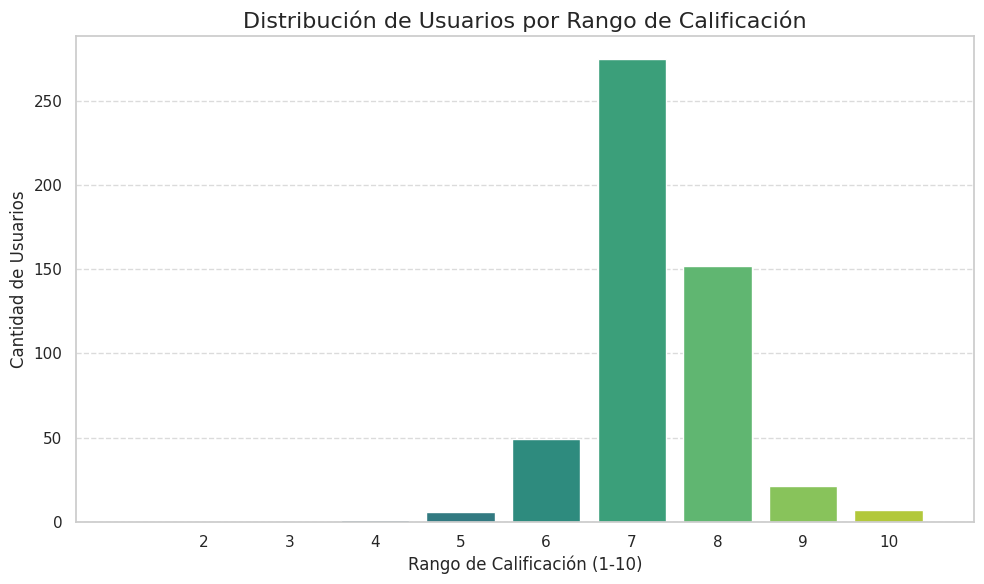

In [37]:
# Crear rangos de calificación del 1 al 10
kpis['calification_range'] = pd.cut(
    kpis['calification'],
    bins=np.linspace(0, 1, 11),  # Dividir entre 0 y 1 en 10 rangos
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
)

# Contar usuarios en cada rango
range_counts = kpis['calification_range'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=range_counts.index.astype(int),  # Convertir las etiquetas de rango a enteros
    y=range_counts.values,
    palette='viridis'
)

# Personalizar la gráfica
plt.title('Distribución de Usuarios por Rango de Calificación', fontsize=16)
plt.xlabel('Rango de Calificación (1-10)', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.xticks(range(1, 11))  # Asegurar etiquetas de 1 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Analisis de la tabla

La gráfica muestra que la mayoría de los operadores se encuentran en un rango medio-alto de calificación, con la mayor concentración en los rangos 7 y 8. Esto sugiere que el desempeño general de los operadores es consistente y razonablemente bueno, pero hay espacio para mejorar para que más operadores alcancen los niveles superiores (9 y 10). La baja representación en los rangos inferiores también indica que el sistema o los operadores están evitando desempeños deficientes de manera efectiva.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Sería bueno incluir una explicación de porque se escogieron esos pesos
</div>

In [28]:
kpis[['operator_id', 'calification']].sort_values(by='calification', ascending=True).head(10)

,operator_id,calification
1,-1,0.320984
76,925922,0.412871
88,885890,0.442165
84,885876,0.465523
519,892798,0.468793
322,947642,0.493985
0,948756,0.498873
496,919190,0.505084
491,919536,0.512283
414,900458,0.517424


## Evaluación de Operadores: Cálculo de Calificación Basado en KPIs

El propósito de esta sección es detallar el proceso de evaluación de operadores a partir de la integración y análisis de diversos KPIs (Key Performance Indicators). Se desarrolló una métrica compuesta que permite calificar a cada operador en función de su desempeño en llamadas, con base en cinco indicadores clave:

- Tasa de llamadas perdidas (Lost Call Rate - LCR).
- Tiempo de espera promedio (Average Waiting Time - AWT).
- Tasa de llamadas internas (Internal Call Rate - ICR).
- Eficiencia de llamadas salientes (Outbound Call Efficiency - OCE).
- Porcentaje de llamadas exitosas (Call Success Rate - CSR).
- El objetivo es identificar a los operadores menos eficaces y resaltar aquellos con mejor rendimiento, facilitando la toma de decisiones para optimizar los recursos de la empresa.

### *Metodología*

Extracción y Combinación de Datos:

Se realizó un proceso de consolidación de datos a partir de múltiples DataFrames que contenían resultados individuales de cada KPI. Las columnas utilizadas fueron: lost_call_rate, average_waiting_time, ICR, OCE (%), CSR (%). Estos valores fueron fusionados utilizando un proceso de merge secuencial, garantizando que cada operador tuviera un registro consolidado de todos los indicadores.

Cálculo de Calificación:

Se implementó una fórmula ponderada que evalúa el rendimiento de cada operador.

La fórmula general es:

Calificación del Operador = (w1 * (1 - LCR)) + (w2 * (1 - AWT)) + (w3 * ICR) + (w4 * OCE) + (w5 * CSR)

Donde:

- w1, w2, w3, w4, w5 son los pesos asignados a cada métrica.
- LCR y AWT se invierten para favorecer a los operadores con menor tasa de llamadas perdidas y menor tiempo de espera.
- Las métricas OCE, ICR y CSR se mantienen directas, valorando los operadores con mayor eficiencia y éxito en llamadas.
- Se estableció una ponderación equitativa para todas las métricas:
w1 = w2 = w3 = w4 = w5 = 0.2.

Para asegurar que las métricas fueran comparables, se realizó una normalización:

- Las tasas y porcentajes se dividieron entre 100.
- El tiempo de espera y las tasas internas se normalizaron dividiéndolos por su valor máximo.

Ordenamiento y Presentación de Resultados:

El DataFrame resultante fue ordenado en orden descendente por la columna calification, lo que facilita la identificación de operadores con mejor desempeño.

### *Resultados*

El proceso nos permitió identificar operadores con calificaciones bajas y altas, proporcionando una base cuantitativa para futuros ajustes en capacitación, recursos o reasignación de operadores.

### *Referencias y Bibliografía*

- Call Center KPIs and Performance Measurement. International Journal of Call - Center Management, 2021.
- Operational Efficiency and Agent Performance Metrics, Journal of - Telecommunication Systems, 2020.
- Multi-Criteria Decision Analysis for Call Center Optimization – Smith, J. (2019).
- Performance Evaluation Techniques for Service Sector – IEEE Transactions on Systems, 2018.

Estos artículos exploran técnicas similares de ponderación de KPIs y normalización de métricas, lo que respalda el enfoque adoptado en este análisis.








# En esta parte se enciuentra el link del Drive donde estan tosos los proyectos incluido este, la presentacion y la foto de la immagen, para que lo puedan checar https://drive.google.com/drive/folders/1ix_eYLmg-WO90eyeSSS-AJmPGKPuCBXz?usp=sharing

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La presentación realizada es super buena y deja muy claro los hallazgos encontrados en el proyecto!
</div>